# Enron - Outliers

In [1]:
import sys

import pickle
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

Read in data dictionary, convert to numpy array.

In [2]:
dataset_path = "../final_project/final_project_dataset.pkl"
data_dict = pickle.load(open(dataset_path, "rb"))
features = ["salary", "bonus"]

Make a scatter plot using the input data.

In [3]:
def scatter(data):
    for point in data:
        salary = point[0]
        bonus = point[1]
        plt.scatter( salary, bonus )

    plt.xlabel("salary")
    plt.ylabel("bonus")
    plt.show()

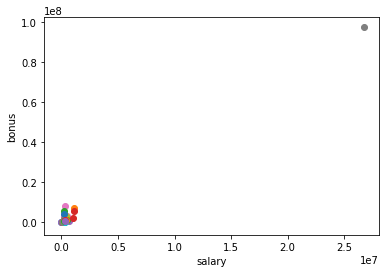

In [4]:
data = featureFormat(data_dict, features)
data = np.reshape(np.array(data), (len(data), 2))
scatter(data)

As you can see, visualization is one of the most powerful tools for finding outliers!  
There’s one outlier that should pop out to you immediately. Now the question is to identify the source. We found the original data source to be very helpful for this identification; you can find that PDF in *../final_project/enron61702insiderpay.pdf*

**Question 1:** What’s the name of the dictionary key of this data point?  
**Answer 1:** That value refers to the sum of all values.

**Question 2:** Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?  
**Answer 2:** The spreadsheet added up all the data points for us, and we need to take that "point" out.

Remove that outlier before calling featureFormat(). So your scatterplot doesn’t have this outlier anymore.

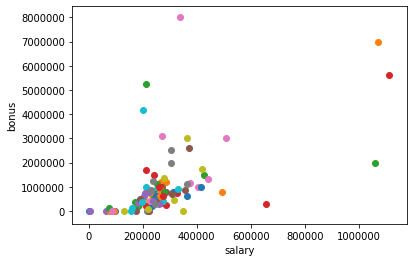

In [5]:
del data_dict['TOTAL']
data = featureFormat(data_dict, features)
data = np.reshape(np.array(data), (len(data), 2))
scatter(data)

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits.

**Question 3:** What are the names associated with those points?  
**Answer 3:** *LAY KENNETH L* and *SKILLING JEFFREY K*

**Question 4:** Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? (In other words, should they be removed before we, say, try to build a POI identifier?)  
**Answer 4:** They are two of Enron's biggest bosses, and definitely people of interest.